In [1]:
import xarray as xr
xr.set_options(display_style="html")
import fsspec
from fsspec.implementations.zip import ZipFileSystem

In [2]:
url = "https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip"
fs = ZipFileSystem(url)

In [3]:
fp = fs.open('geo_data/pism1.0_paleo06_6000/geometry_paleo_1ka.nc') 
ds = xr.open_dataset(fp)
#ds.to_netcdf('paleo-pism-6000.nc')
ds = xr.open_dataset('paleo-pism-6000.nc')

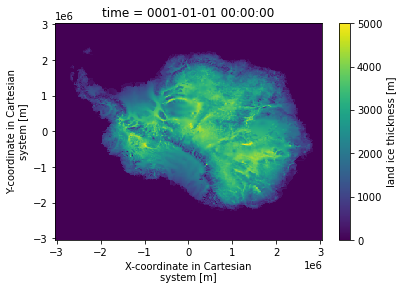

In [4]:
ds.thk[-1].plot()

Add ensemble_number as a new coordinate

In [4]:
ds.nbytes/1e6

217.750596

In [13]:
fs.ls("geo_data/aggregated_data/")


['geo_data/aggregated_data/le_all06_16km.txt',
 'geo_data/aggregated_data/pism1.0_paleo06_6000.csv',
 'geo_data/aggregated_data/sl.nc']

In [9]:
import numpy as np
import fsspec
import pandas as pd
of = fsspec.open("zip://geo_data/aggregated_data/pism1.0_paleo06_6000.csv::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip")
with of as f:
    df = pd.read_csv(f,sep="\s", engine='python')

In [22]:
print(type(id_initial))
id_initial = np.array([6000])

id_str = '6001'

df['ens_member'].str.contains(id_str)

<class 'numpy.ndarray'>


"4c0061ab1c    False
"4285666f5a     True
"5b47ed665c    False
"375c4dd801    False
"0be20f4421    False
               ...  
"a40e6a34cc    False
"1d678fa360    False
"8b33c01605    False
"2d5de15671    False
"bea39e7c43    False
Name: ens_member, Length: 256, dtype: bool

In [28]:
id_str = '6004'
id_initial = np.array([id_str])

ds2 = ds.expand_dims("id").assign_coords(id=("id",id_initial))   


ds3 = ds2.assign_coords({"par_esia":  ('id', [df.sia_e[df['ens_member'].str.contains(id_str)][0]] ), 
                        "par_ppq":   ('id', [df.ppq[df['ens_member'].str.contains(id_str)][0]] ),
                        "par_prec":  ('id', [df.prec[df['ens_member'].str.contains(id_str)][0]] ),
                        "par_visc":  ('id', [df.visc[df['ens_member'].str.contains(id_str)][0]])
                       } 
                      )
ds3

<xarray.Dataset>
Dimensions:      (id: 1, time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * id           (id) <U4 '6004'
    par_esia     (id) float64 2.0
    par_ppq      (id) float64 0.25
    par_prec     (id) float64 0.02
    par_visc     (id) float64 0.1
Dimensions without coordinates: nv
Data variables:
    bmelt        (id, time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    thk          (id, time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    time_bounds  (id, time, nv) timedelta64[ns] 64852 days 05:16:13.844045639...
    topg         (id, time, y, x) float32 -4.998e+03 -5e+03 ... -5e+03
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history:  Tue Oct 19 14:10:39 2021: ncatted -a history_of_appended_files,...

In [35]:
fs.ls("geo_data/")

['geo_data/COPYING',
 'geo_data/LICENSE',
 'geo_data/README.md',
 'geo_data/aggregated_data/',
 'geo_data/convert_data/',
 'geo_data/pism1.0_paleo06_6000/',
 'geo_data/pism1.0_paleo06_6001/',
 'geo_data/pism1.0_paleo06_6002/',
 'geo_data/pism1.0_paleo06_6003/',
 'geo_data/pism1.0_paleo06_6004/',
 'geo_data/pism1.0_paleo06_6005/',
 'geo_data/pism1.0_paleo06_6006/',
 'geo_data/pism1.0_paleo06_6007/',
 'geo_data/pism1.0_paleo06_6008/',
 'geo_data/pism1.0_paleo06_6009/',
 'geo_data/pism1.0_paleo06_6010/',
 'geo_data/pism1.0_paleo06_6011/',
 'geo_data/pism1.0_paleo06_6012/',
 'geo_data/pism1.0_paleo06_6013/',
 'geo_data/pism1.0_paleo06_6014/',
 'geo_data/pism1.0_paleo06_6015/',
 'geo_data/pism1.0_paleo06_6016/',
 'geo_data/pism1.0_paleo06_6017/',
 'geo_data/pism1.0_paleo06_6018/',
 'geo_data/pism1.0_paleo06_6019/',
 'geo_data/pism1.0_paleo06_6020/',
 'geo_data/pism1.0_paleo06_6021/',
 'geo_data/pism1.0_paleo06_6022/',
 'geo_data/pism1.0_paleo06_6023/',
 'geo_data/pism1.0_paleo06_6024/',
 'g

In [54]:
fname = "zip://geo_data/pism1.0_paleo06_6000/geometry_paleo_1ka.nc::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip"
id_temp = np.array([fname[31:35]])
print(np.shape(id_temp))

(1,)


In [1]:
#ensemble_numbers = list(range(6000,6166)) + list(['6165c']) + list(range(6166,6256))

# We will concatanate over the ensemble number (as a first attempt)

# create identification numbers 
ids = list(range(6000,6256))

# use the ensemble numbers to make a ConcatDim
from pangeo_forge_recipes.patterns import ConcatDim
id_concat_dim = ConcatDim("id", ids, nitems_per_file=1)

# define a function for making the URL
def make_url(id):
    return f"zip://geo_data/pism1.0_paleo06_{id}/geometry_paleo_1ka.nc::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip"

# make a FilePattern
from pangeo_forge_recipes.patterns import FilePattern
pattern = FilePattern(make_url, id_concat_dim)

import numpy as np
import fsspec
import pandas as pd
of = fsspec.open("zip://geo_data/aggregated_data/pism1.0_paleo06_6000.csv::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip")
with of as f:
    df = pd.read_csv(f,sep="\s", engine='python')

def add_id_as_dim_and_coord(ds, fname):
    id_str = fname[31:35]
    id_num = np.array([id_str])
    ds = ds.expand_dims("id").assign_coords(id=("id",id_num))   
    ds = ds.assign_coords({"par_esia":  ('id', [df.sia_e[df['ens_member'].str.contains(id_str)][0]] ), 
                            "par_ppq":   ('id', [df.ppq[df['ens_member'].str.contains(id_str)][0]] ),
                            "par_prec":  ('id', [df.prec[df['ens_member'].str.contains(id_str)][0]] ),
                            "par_visc":  ('id', [df.visc[df['ens_member'].str.contains(id_str)][0]])
                            } 
                           )
    return ds


# make a recipe using the ConcatDim and FilePattern objects we just made
from pangeo_forge_recipes.recipes import XarrayZarrRecipe
recipe = XarrayZarrRecipe(pattern, 
                          inputs_per_chunk=1,
                          process_input=add_id_as_dim_and_coord)    # one per chunk because each nc is ~210 MB

# optionally turn on logging
from pangeo_forge_recipes.recipes import setup_logging
setup_logging("DEBUG")


recipe_pruned = recipe.copy_pruned()
run_function = recipe_pruned.to_function()
run_function()

pangeo_forge_recipes.recipes.xarray_zarr - INFO - Caching input 'Index({DimIndex(name='id', index=0, sequence_len=2, operation=<CombineOp.CONCAT: 2>)})'
pangeo_forge_recipes.storage - INFO - Caching file 'zip://geo_data/pism1.0_paleo06_6000/geometry_paleo_1ka.nc::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip'
pangeo_forge_recipes.storage - INFO - Copying remote file 'zip://geo_data/pism1.0_paleo06_6000/geometry_paleo_1ka.nc::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip' to cache
pangeo_forge_recipes.storage - DEBUG - entering fs.open context manager for /tmp/tmpddu_okjb/86fn4ARP/4b699984c60f760669a103176a6b1dcd-zip_geo_data_pism1.0_paleo06_6000_geometry_paleo_1ka.nc_https_download.pangaea.de_dataset_940149_files_paleo_ensemble_geo_2022.zip
pangeo_forge_recipes.storage - DEBUG - FSSpecTarget.open yielding <fsspec.implementations.local.LocalFileOpener object at 0x7ff206bda5b0>
pangeo_forge_recipes.storage - DEBUG - _copy_btw_

/srv/conda/envs/notebook/lib/python3.9/site-packages/pangeo_forge_recipes/recipes/xarray_zarr.py:115: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  return xr.open_zarr(target.get_mapper())


pangeo_forge_recipes.recipes.xarray_zarr - DEBUG - <xarray.Dataset>
Dimensions:      (id: 1, time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * id           (id) <U4 '6000'
    par_esia     (id) float64 1.0
    par_ppq      (id) float64 0.25
    par_prec     (id) float64 0.02
    par_visc     (id) float64 0.1
Dimensions without coordinates: nv
Data variables:
    bmelt        (id, time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    thk          (id, time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    time_bounds  (id, time, nv) timedelta64[ns] 64852 days 05:16:13.844045824...
    topg         (id, time, y, x) float32 -4.998e+03 -5e+03 ... -5e+03
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history: 

In [2]:
import xarray as xr
pism_zarr = xr.open_zarr(recipe_pruned.target_mapper, consolidated=True)
pism_zarr

<xarray.Dataset>
Dimensions:      (id: 2, time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * id           (id) <U4 '6000' '6001'
    par_esia     (id) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    par_ppq      (id) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    par_prec     (id) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    par_visc     (id) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Dimensions without coordinates: nv
Data variables:
    bmelt        (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
    thk          (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
    time_bounds  (id, time, nv) timedelta64[ns] dask.array<chunksize=(1, 125, 2), meta=np.ndarray>
    topg         (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history:  Tue Oct 19 14:10:39 2021: ncatted -a history_of_appended_files,...

In [32]:
pism_zarr.par_visc.load()

<xarray.DataArray 'par_visc' (id: 2)>
array([0.1, 0.5])
Coordinates:
  * id        (id) <U4 '6000' '6001'
    par_esia  (id) float64 1.0 1.0
    par_ppq   (id) float64 0.25 0.25
    par_prec  (id) float64 0.02 0.02
    par_visc  (id) float64 0.1 0.5

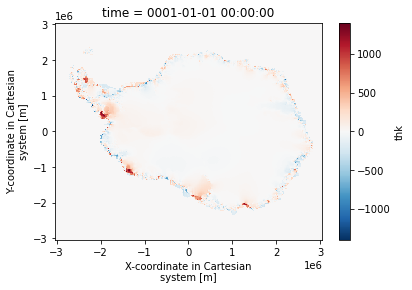

In [63]:
thick_diff = pism_zarr.thk[0,-1] - pism_zarr.thk[1,-1]
thick_diff.plot()

In [ ]:
present = present.assign(index=present["id"])
# make MultiIndex object (this assumes that these do not change over time and that time is the first dimension)
arrays = [present.par_esia[0].values, present.par_ppq[0].values, present.par_prec[0].values, present.par_visc[0].values]
MI = pd.MultiIndex.from_arrays(arrays, names=('par_esia', 'par_ppq','par_prec','par_visc'))
# replace the id coordinate with this MultiIndex Object
present.coords['id'] = MI
# unstack
present = present.unstack(dim='id')

In [5]:
# add the parameter values
import fsspec
import pandas as pd
of = fsspec.open("zip://geo_data/aggregated_data/pism1.0_paleo06_6000.csv::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip")
with of as f:
    df = pd.read_csv(f,sep="\s", engine='python')
df.head()


,ens_member,ecalv,flex,gamma_T,hcalv,overturning_coeff,pdd_ice,pdd_snow,pdd_std,ppq,prec,sia_e,ssa_e,till_dec,till_efo,uthres,visc
"""4c0061ab1c","6000""",1.000000e+17,5.0,1.0,75.0,0.8,8.8,3.0,5.0,0.25,0.02,1.0,0.6,3.1,0.04,100.0,0.1
"""4285666f5a","6001""",1.000000e+17,5.0,1.0,75.0,0.8,8.8,3.0,5.0,0.25,0.02,1.0,0.6,3.1,0.04,100.0,0.5
"""5b47ed665c","6002""",1.000000e+17,5.0,1.0,75.0,0.8,8.8,3.0,5.0,0.25,0.02,1.0,0.6,3.1,0.04,100.0,2.5
"""375c4dd801","6003""",1.000000e+17,5.0,1.0,75.0,0.8,8.8,3.0,5.0,0.25,0.02,1.0,0.6,3.1,0.04,100.0,10.0
"""0be20f4421","6004""",1.000000e+17,5.0,1.0,75.0,0.8,8.8,3.0,5.0,0.25,0.02,2.0,0.6,3.1,0.04,100.0,0.1


In [21]:
temp = df.sia_e[df['ens_member'].str.contains("6001", case=True)]



"4285666f5a    1.0
Name: sia_e, dtype: float64

In [52]:
#df.loc[df['Name'].str.contains("pokemon", case=False)]
type(df.sia_e.loc[df['ens_member'].str.contains("6001", case=True)][0])

#df['ens_member'][0][0:-1]

numpy.float64

In [53]:
# this is an old version of the zarr, which I know has ensemble_number included (it is called id)
import xarray as xr
import gcsfs
import numpy as np
import pandas as pd

gsurl = "gs://ldeo-glaciology/paleo_ensemble/"
gcs = gcsfs.GCSFileSystem(mode='ab')
present = xr.open_zarr(gcs.get_mapper(gsurl+'present.zarr'))  
present

<xarray.Dataset>
Dimensions:      (id: 255, time: 1, y: 381, x: 381, par_esia: 4, par_ppq: 4,
                  par_prec: 4, par_visc: 4)
Coordinates:
    lat          (y, x) float64 dask.array<chunksize=(191, 191), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(191, 191), meta=np.ndarray>
    par_esia     (time, id) float64 dask.array<chunksize=(1, 255), meta=np.ndarray>
    par_ppq      (time, id) float64 dask.array<chunksize=(1, 255), meta=np.ndarray>
    par_prec     (time, id) float64 dask.array<chunksize=(1, 255), meta=np.ndarray>
    par_visc     (time, id) float64 dask.array<chunksize=(1, 255), meta=np.ndarray>
  * time         (time) float64 50.0
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Dimensions without coordinates: id
Data variables:
    dbdt         (id, time, y, x) float64 dask.array<chunksize=(32, 1, 48, 96), meta=np.ndarray>
    index        (par_esia, par_ppq, par_prec, par_visc) int64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    mask         (id, time, y, x) int8 dask.array<chunksize=(64, 1, 96, 96), meta=np.ndarray>
    score        (time, id) float64 dask.array<chunksize=(1, 255), meta=np.ndarray>
    thk          (id, time, y, x) float64 dask.array<chunksize=(32, 1, 48, 96), meta=np.ndarray>
    topg         (id, time, y, x) float64 dask.array<chunksize=(32, 1, 48, 96), meta=np.ndarray>
    usurf        (id, time, y, x) float32 dask.array<chunksize=(32, 1, 96, 96), meta=np.ndarray>
    velsurf_mag  (id, time, y, x) float32 dask.array<chunksize=(32, 1, 96, 96), meta=np.ndarray>
Attributes:
    NCO:              4.6.8
    code:             https://github.com/ldeo-glaciology/pangeo-pismpaleo
    command:           /p/tmp/albrecht/pism18/pismOut/pism_paleo/pism1.0_pale...
    contact:          albrecht@pik-potsdam.de
    date:             2020-12-07
    history:          
    notes:            PISM paleo ensemble data as in https://doi.org/10.1594/...
    parameter_space:  {'visc': [1e+20, 5e+20, 2.5e+21, 1e+22], 'sia_e': [1.0,...